## Machine Learning on International Students Mobility: an example of China

In [2]:
# Data Management/Investigation
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss
import requests # For downloading the website
from bs4 import BeautifulSoup # For parsing the website
import time # To put the system to sleep
import random # for random numbers
import country_converter as coco
import sqlite3
import seaborn as sns## implement a maploptlib thing 
import matplotlib.pyplot as plt## a library to build plot 
pd.options.display.max_rows = 10000

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN_C
from sklearn.neighbors import KNeighborsRegressor as KNN_R
from sklearn.ensemble import RandomForestClassifier as RF_C
from sklearn.ensemble import RandomForestRegressor as RF_R
from sklearn.tree import DecisionTreeRegressor as DTree_R
from sklearn.linear_model import LogisticRegression as LR
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag
# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# For model interpretation
from sklearn.inspection import (
    permutation_importance,
    partial_dependence, 
    PartialDependenceDisplay, 
    plot_partial_dependence
)
##For country names standardization
import country_converter as coco
# Misc
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as st

# Regression_model

## Data Preprocessing 

### Data Wrangle 

In [22]:
##importe the data
## clean the variable of "unemployment"
unemployment=pd.read_excel('unemployment.xls',header=3,names=None)
##change the index
unemployment=unemployment.set_index('Country Name')
##select the part needed
E0=unemployment.iloc[:,53:62]
##copy the index
E0['Country Name'] = E0.index
#E0.head(4)

####standardize the countries name
cc = coco.CountryConverter()
E0["Country_Name_stan"] = cc.convert(E0["Country Name"], to = 'name_short')

E1=E0.set_index('Country_Name_stan')##change the index
E2=E1.drop(columns=["Country Name"])##drop extra columns 
E2['Country Name'] = E2.index##copy the index 
##reshape the df into long formate 
E3=pd.melt(E2,id_vars=['Country Name'])
E3=E3.rename(columns={"value":"unemployment"})##rename the column
E3=E3.rename(columns={"variable":"year"})##rename the column
E3["year"] = E3["year"].astype('int')##change the data type
#E3.dtypes

Africa Eastern and Southern not found in regex
Africa Western and Central not found in regex
Arab World not found in regex
Central Europe and the Baltics not found in regex
Channel Islands not found in regex
Caribbean small states not found in regex
East Asia & Pacific ( not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia not found in regex
Euro area not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
High income not found in regex
Heavily indebted poor countries (HIPC) not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA total not found in regex
IDA blend not found in regex
IDA only not found in regex
Not classified not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean not found in regex
Least developed countries: UN classification not fo

In [23]:
students_CTC = pd.read_excel("students_coing_to_China.xlsx")
students_CTC["Country Name"] = cc.convert(students_CTC["country"], to = 'name_short')

## marke the years
students_CTC.loc[students_CTC['year'] == 10,'year'] = 2010
students_CTC.loc[students_CTC['year'] == 11,'year'] = 2011
students_CTC.loc[students_CTC['year'] == 12,'year'] = 2012
students_CTC.loc[students_CTC['year'] == 13,'year'] = 2013
students_CTC.loc[students_CTC['year'] == 14,'year'] = 2014
students_CTC.loc[students_CTC['year'] == 15,'year'] = 2015
students_CTC.loc[students_CTC['year'] == 16,'year'] = 2016
students_CTC.loc[students_CTC['year'] == 17,'year'] = 2017
students_CTC.loc[students_CTC['year'] == 18,'year'] = 2018
#students_CTC.head(4)

##merge the two columns based on "country"
students_CTC_new0=pd.merge(students_CTC,E3,on=["Country Name","year"])
#students_CTC_new0.head(4)

E4=students_CTC_new0.filter(["Country Name","year","unemployment"])
##reshape the data frame to wide for cleaning purpose
E5=E4.pivot_table(values='unemployment', columns='year', index='Country Name')
#E5.head(4)
##use linear interpolation to complete the missing values
filled_df = E5.interpolate(axis=1)
#filled_df.head(4)
##Fill the NAN with the values after the NAN
filled_df.fillna(method='backfill',inplace=True,axis=1)
filled_df.head(4)
##copy the index 
filled_df['Country Name'] = filled_df.index
##reshape the df
E6=pd.melt(filled_df,id_vars=['Country Name'])
##rename the column
E6=E6.rename(columns={"value":"unemployment"})
#E6.head(4)

##merge the two columns based on "country"
students_CTC_new=pd.merge(students_CTC,E6,on=["Country Name","year"])
#students_CTC_new.head(4)
##clean the variable of "GDP per capita"
GDP_per=pd.read_excel('GDP per capita(constant2015).xls',header=3,names=None)##importe the data
#GDP_per.head(4)

##change the index
GDP_per=GDP_per.set_index('Country Name')
##select the part needed
G0=GDP_per.iloc[:,53:62]
##copy the index
G0['Country Name'] = G0.index
#G0.head(4)

####standardize the countries name
cc = coco.CountryConverter()
G0["Country_Name_stan"] = cc.convert(G0["Country Name"], to = 'name_short')

Africa Eastern and Southern not found in regex
Africa Western and Central not found in regex
Arab World not found in regex
Central Europe and the Baltics not found in regex
Channel Islands not found in regex
Caribbean small states not found in regex
East Asia & Pacific ( not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia not found in regex
Euro area not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
High income not found in regex
Heavily indebted poor countries (HIPC) not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA total not found in regex
IDA blend not found in regex
IDA only not found in regex
Not classified not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean not found in regex
Least developed countries: UN classification not fo

In [24]:
G1=G0.set_index('Country_Name_stan')##change the index
G2=G1.drop(columns=["Country Name"])##drop extra columns 
G2['Country Name'] = G2.index##copy the index 
##reshape the df into long formate 
G3=pd.melt(G2,id_vars=['Country Name'])
G3=G3.rename(columns={"value":"GDP_per_capita"})##rename the column
G3=G3.rename(columns={"variable":"year"})##rename the column
#G3.head(4)

#G3.dtypes
G3["year"] = G3["year"].astype('int')##change the data type
G3.dtypes
##merge the two columns based on "country"
students_CTC_new1=pd.merge(students_CTC,G3,on=["Country Name","year"])
#students_CTC_new1.head(4)

G4=students_CTC_new1.filter(["Country Name","year","GDP_per_capita"])
##reshape the data frame to wide for cleaning purpose
G5=G4.pivot_table(values='GDP_per_capita', columns='year', index='Country Name')
#G5.head(4)

### Missing Data

In [27]:
##use linear interpolation to complete the missing values
filled_df1 = G5.interpolate(axis=1)
#filled_df1.head(4)

##Fill the NAN with the values after the NAN
filled_df1.fillna(method='backfill',inplace=True,axis=1)
filled_df1['Country Name'] = filled_df1.index##copy the index 
G6=pd.melt(filled_df1,id_vars=['Country Name'])##reshape the df
G6=G6.rename(columns={"value":"GDP_per_capita"})##rename the column
#G6.head(4)

##merge the two columns based on "country"
students_CTC_new2=pd.merge(students_CTC_new,G6,on=["Country Name","year"])
students_CTC_new2.head(4)

,region,country,year,stu_CTC,stu_undergra,stu_postgra,stu_degree,stu_non_degree,scholarship_num_CTC,stu_teacher_ratio,...,financial_percapital,Academic_recognition,outbound_higheredu,value_of_trade,distance,RD_number,GDP _percapital,Country Name,unemployment,GDP_per_capita
0,Asia,Afghanistan,2010,225,115,9,124,101,63,30.1884,...,108.7195,0,7759,178945028,4180.438,1101.6867,543.3030,Afghanistan,1.69,1.597483e+10
1,Asia,Afghanistan,2011,291,155,16,171,120,90,31.8953,...,96.0948,0,9344,234413053,4180.438,1165.2520,528.7366,Afghanistan,1.69,1.604294e+10
2,Asia,Afghanistan,2012,335,181,24,205,130,95,29.2280,...,83.4700,0,9685,469220111,4180.438,1186.6525,576.1901,Afghanistan,1.69,1.808878e+10
3,Asia,Afghanistan,2013,385,210,41,251,134,102,26.5606,...,70.8453,0,13338,337854104,4180.438,1243.4696,587.5651,Afghanistan,4.80,1.910189e+10


In [29]:
##find China's GDP_per_capita from 2010-2018.Aim: use 
G0_China=G0.loc[G0["Country Name"] == "China"]
G0_China.iloc[:,:9]

##reshape the df into long formate 
G0_China1=pd.melt(G0_China,id_vars=['Country Name'])
G0_China10=G0_China1.rename(columns={'variable':'year','value':'China_GDP_per','Country Name':'China'}) 
G0_China13=G0_China10.iloc[:9,:]
#G0_China13.dtypes

G0_China13["year"]= G0_China13["year"].astype('int')##change the data type
G0_China13["China_GDP_per"]= G0_China13["China_GDP_per"].astype('float')##change the data type
#G0_China13.dtypes
##merge the two df based on "country"
students_CTC_new2["year"]=students_CTC_new2["year"].astype('int')##change the data type
#students_CTC_new2.dtypes

##left merge two data frame
students_CTC_China_new9=students_CTC_new2.merge(G0_China13,how="left",on="year")
#students_CTC_China_new9.head(4)

## divide GDP_per_capita by China_GDP_per to generate a new variable called vis_a_vis_GDP
students_CTC_China_new9["vis_a_vis_GDP"]=students_CTC_China_new9["GDP_per_capita"]/students_CTC_China_new9["China_GDP_per"]
## divide scholarship_num_CTC by stu_CTC to generate a new variable called the precentage of students gain scholarship 
students_CTC_China_new9["precentage_of_scholarship"]=students_CTC_China_new9["scholarship_num_CTC"]/students_CTC_China_new9["stu_CTC"]
#students_CTC_China_new9.head(4)

##add HDI_countries_classification
HDI_countries = pd.read_excel("HDI_countries_cat.xlsx")
#HDI_countries.head(4)

cc = coco.CountryConverter()
HDI_countries["Country Name"] = cc.convert(HDI_countries["Country"], to = 'name_short')##standardize country name 
#HDI_countries.head(4)

students_CTC_China_new8=students_CTC_China_new9.merge(HDI_countries,how="left",on="Country Name")
students_CTC_China_new7=students_CTC_China_new8.drop(columns=["country","GDP _percapital","China","China_GDP_per","Country"])
#students_CTC_China_new7.head(4)

# arrange the order of columns 
d = students_CTC_China_new7.pop('Country Name')
students_CTC_China_new7.insert(0,'Country Name', d) 
students_CTC_China_new7.head(4)

,Country Name,region,year,stu_CTC,stu_undergra,stu_postgra,stu_degree,stu_non_degree,scholarship_num_CTC,stu_teacher_ratio,...,Academic_recognition,outbound_higheredu,value_of_trade,distance,RD_number,unemployment,GDP_per_capita,vis_a_vis_GDP,precentage_of_scholarship,HDI_cat
0,Afghanistan,Asia,2010,225,115,9,124,101,63,30.1884,...,0,7759,178945028,4180.438,1101.6867,1.69,1.597483e+10,0.002115,0.280000,Least Developed Countries
1,Afghanistan,Asia,2011,291,155,16,171,120,90,31.8953,...,0,9344,234413053,4180.438,1165.2520,1.69,1.604294e+10,0.001939,0.309278,Least Developed Countries
2,Afghanistan,Asia,2012,335,181,24,205,130,95,29.2280,...,0,9685,469220111,4180.438,1186.6525,1.69,1.808878e+10,0.002026,0.283582,Least Developed Countries
3,Afghanistan,Asia,2013,385,210,41,251,134,102,26.5606,...,0,13338,337854104,4180.438,1243.4696,4.80,1.910189e+10,0.001986,0.264935,Least Developed Countries


### Data Store

In [30]:
##export data to store
#students_CTC_China_new7.to_excel(excel_writer=r'C:/Users/little page/Desktop/final_project/stu_CTC_new.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/little page/Desktop/final_project/stu_CTC_new.xlsx'

## Feature Engineering 

In [31]:
students_CTC = pd.read_excel("students_coing_to_China.xlsx")
students_CTC_new = pd.read_excel("stu_CTC_new.xlsx")
#students_CTC_new.head(10)
students_CTC_new = pd.read_excel("stu_CTC_new.xlsx")
#students_CTC_new.head(4)
students_CTC_new.replace({"HDI_cat":{"Least Developed Countries":0,"developing":0,"developed":1}},inplace=True)
#students_CTC_new.shape

students_CTC_new=students_CTC_new.rename(columns={ 'region ': 'region','distance ':'distance'}) 
# Filter method to "filter out" columns
students_CTC_new0=students_CTC_new.filter(['scholarship_num_CTC', 'stu_teacher_ratio', 'enrol_higheredu',
       'financial_percapital', 'Academic_recognition', 'outbound_higheredu',
       'value_of_trade', 'distance', 'RD_number', 'unemployment',
       'GDP_per_capita', 'vis_a_vis_GDP', 'precentage_of_scholarship',
       'HDI_cat'])

### Potential Multicollinearity

In [32]:
students_CTC_new0.corr()

,scholarship_num_CTC,stu_teacher_ratio,enrol_higheredu,financial_percapital,Academic_recognition,outbound_higheredu,value_of_trade,distance,RD_number,unemployment,GDP_per_capita,vis_a_vis_GDP,precentage_of_scholarship,HDI_cat
scholarship_num_CTC,1.000000,0.182302,-0.034644,-0.049437,0.268857,0.373116,0.333890,-0.324221,-0.064208,-0.152909,0.225904,0.189669,-0.109042,-0.124778
stu_teacher_ratio,0.182302,1.000000,-0.083277,0.085305,-0.030626,0.223075,0.058599,-0.037027,-0.142634,-0.043291,0.090033,0.084810,-0.210596,-0.134291
enrol_higheredu,-0.034644,-0.083277,1.000000,-0.300129,0.321423,0.242457,0.221163,-0.056299,0.451267,0.181185,0.282630,0.272624,-0.194068,0.344881
financial_percapital,-0.049437,0.085305,-0.300129,1.000000,-0.156517,-0.153654,-0.120212,0.113438,-0.136329,-0.078790,-0.114971,-0.112090,0.183686,-0.093432
Academic_recognition,0.268857,-0.030626,0.321423,-0.156517,1.000000,0.342576,0.336191,-0.416865,0.069453,-0.104537,0.206209,0.201945,-0.178150,0.040811
outbound_higheredu,0.373116,0.223075,0.242457,-0.153654,0.342576,1.000000,0.571738,-0.321658,0.065666,-0.092366,0.574329,0.543487,-0.383622,0.042909
value_of_trade,0.333890,0.058599,0.221163,-0.120212,0.336191,0.571738,1.000000,-0.255941,0.141482,-0.153874,0.641493,0.618431,-0.364602,0.125945
distance,-0.324221,-0.037027,-0.056299,0.113438,-0.416865,-0.321658,-0.255941,1.000000,-0.153611,0.121486,-0.150881,-0.147583,0.218576,-0.118316
RD_number,-0.064208,-0.142634,0.451267,-0.136329,0.069453,0.065666,0.141482,-0.153611,1.000000,0.000585,0.198692,0.185794,-0.153837,0.611025
unemployment,-0.152909,-0.043291,0.181185,-0.078790,-0.104537,-0.092366,-0.153874,0.121486,0.000585,1.000000,-0.051606,-0.049374,0.172538,-0.005159


<AxesSubplot:>

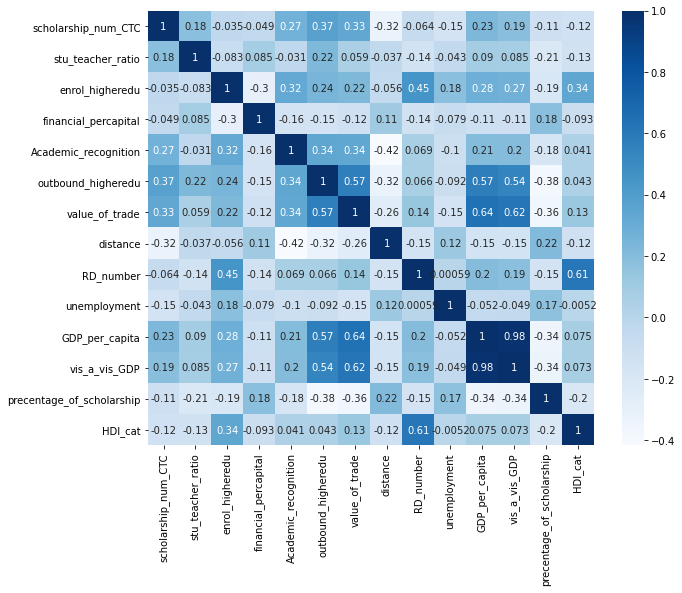

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(students_CTC_new0.corr(),annot=True,cmap="Blues")

## Machine Learning Modeling 

### Data Split 

Set up data in the SKLEARN framework (i.e. outcome separated from the predictors).

In [38]:
# Filter method to "filter out" columns
students_CTC_new1=students_CTC_new.filter(['stu_CTC', 'stu_teacher_ratio', 'enrol_higheredu',
       'financial_percapital', 'Academic_recognition', 'outbound_higheredu',
       'value_of_trade', 'distance', 'RD_number', 'unemployment',
       'GDP_per_capita', 'vis_a_vis_GDP', 'precentage_of_scholarship',
       'HDI_cat'])

students_CTC_new1.replace(np.inf, 0, inplace=True)
#students_CTC_new1.replace(np.inf, 0, inplace=True)
students_CTC_new1=students_CTC_new1.fillna(0)

y =students_CTC_new1['stu_CTC'] 
X =students_CTC_new1[['precentage_of_scholarship', 'stu_teacher_ratio',
       'enrol_higheredu', 'financial_percapital', 'Academic_recognition',
       'outbound_higheredu', 'vis_a_vis_GDP', 'value_of_trade', 'distance',
       'unemployment', 'RD_number', 'HDI_cat']] 

In [39]:
# Look at the training data
#y.describe()

X["stu_teacher_ratio"] =np.where(X["stu_teacher_ratio"]<=0,0,X["stu_teacher_ratio"])
X["enrol_higheredu"] =np.where(X["enrol_higheredu"]<=0,0,X["enrol_higheredu"])
X["financial_percapital"] =np.where(X["financial_percapital"]<=0,0,X["financial_percapital"])
X["RD_number"] =np.where(X["RD_number"]<=0,0,X["RD_number"])

y = pd.DataFrame(y)

In [40]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1998)

### Data Distribution

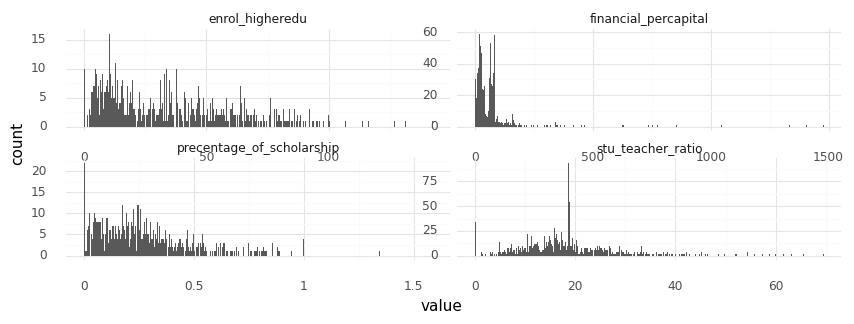

<ggplot: (132381798132)>

In [41]:
d = train_X[["precentage_of_scholarship", "stu_teacher_ratio","stu_teacher_ratio","enrol_higheredu","financial_percapital"]].melt()
(
    ggplot(d,aes(x="value")) +
    geom_histogram() +
    facet_wrap("variable",scales="free") +
    theme_minimal() +
    theme(figure_size = (10,3)) 
) 

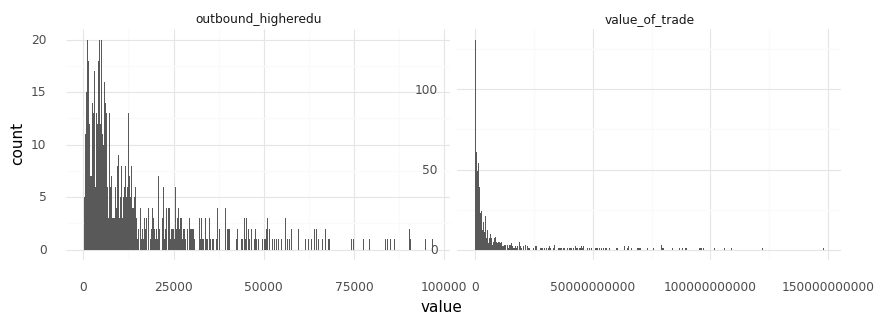

<ggplot: (132381934671)>

In [42]:
e = train_X[["outbound_higheredu","value_of_trade"]].melt()
(
    ggplot(e,aes(x="value")) +
    geom_histogram() +
    facet_wrap("variable",scales="free") +
    theme_minimal() +
    theme(figure_size = (10,3)) 
) 

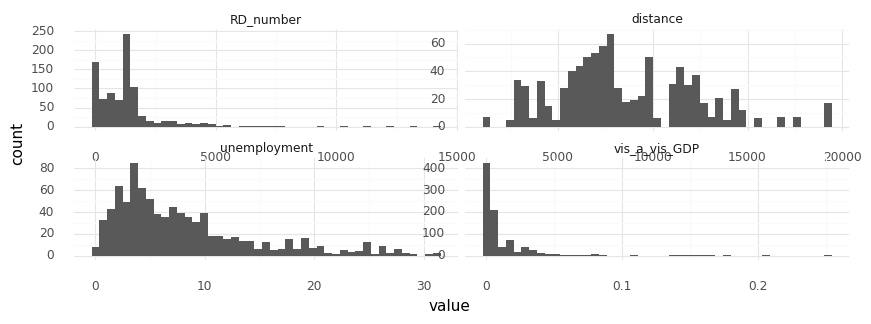

<ggplot: (132382291947)>

In [43]:
f = train_X[["distance", "vis_a_vis_GDP","unemployment","RD_number"]].melt()
(
    ggplot(f,aes(x="value")) +
    geom_histogram() +
    facet_wrap("variable",scales="free") +
    theme_minimal() +
    theme(figure_size = (10,3)) 
) 

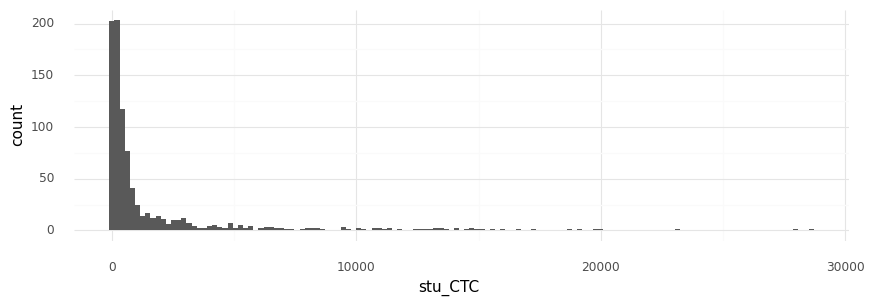

<ggplot: (132381802587)>

In [44]:
## look at the dependent variable
(
    ggplot(pd.DataFrame(train_y),aes(x="stu_CTC")) +
    geom_histogram() +
    theme_minimal() +
    theme(figure_size = (10,3)) 
) 

### Data Pre-processing 

In [45]:
#y.describe()

# Log the variables 
X["financial_percapital"] = np.log(X["financial_percapital"]+1 )
X["enrol_higheredu"] = np.log(X["enrol_higheredu"]+1)
X["outbound_higheredu"] = np.log(X["outbound_higheredu"]+1)
X["value_of_trade"] = np.log(X["value_of_trade"]+1)
X["vis_a_vis_GDP"] = np.log(X["vis_a_vis_GDP"]+1)
X["unemployment"] = np.log(X["unemployment"]+1)
X["RD_number"] = np.log(X["RD_number"]+1)
y["stu_CTC"] = np.log(y["stu_CTC"]+1)

#y.describe()

In [142]:
##resplite the data frame 
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1998)

Let's just look at how the predictors relate to the outcome.

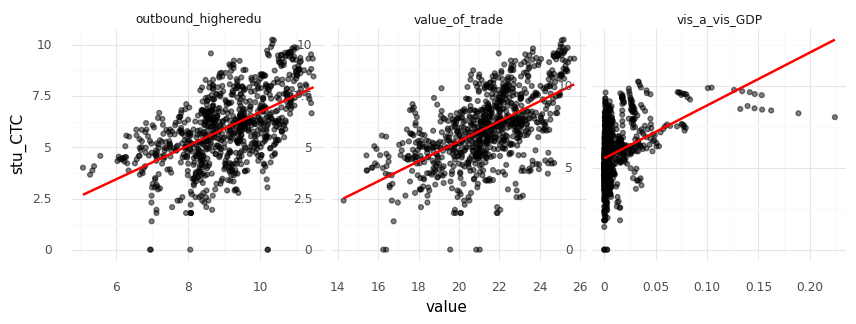

<ggplot: (176565945977)>

In [143]:
train_X_select=train_X.filter(["vis_a_vis_GDP","outbound_higheredu","value_of_trade"])
train_X_select['stu_CTC'] = train_y

(
    ggplot(train_X_select.melt(id_vars=["stu_CTC"]),
           aes(x="value",y="stu_CTC"))+
    geom_point(alpha=.5) +
    facet_wrap("variable",scales="free") +
    geom_smooth(method="lm",se=False,color="red") +
    theme_minimal() +
    theme(figure_size = (10,3)) 
)

In [144]:
#train_X.describe()
#train_y.describe()

,precentage_of_scholarship,stu_teacher_ratio,enrol_higheredu,financial_percapital,Academic_recognition,outbound_higheredu,vis_a_vis_GDP,value_of_trade,distance,unemployment,RD_number,HDI_cat
count,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000
mean,0.272721,19.020035,3.222919,3.673402,0.175339,9.052013,0.011470,21.340916,8592.985293,1.958745,6.376498,0.099548
std,0.212864,10.274237,0.945141,1.137370,0.380472,1.199335,0.022803,2.127454,3694.953620,0.716887,1.733646,0.299565
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.075174,0.000014,14.284820,1172.047000,0.104360,0.000000,0.000000
25%,0.112140,12.555225,2.516651,3.061905,0.000000,8.337707,0.000941,20.072216,6164.891000,1.488400,5.963534,0.000000
50%,0.231376,18.110800,3.472286,3.745398,0.000000,9.142434,0.003138,21.449243,7686.079000,1.968509,7.061550,0.000000
75%,0.366390,23.187525,3.995965,4.351459,0.000000,9.996215,0.012621,22.800440,11432.470000,2.451221,7.282538,0.000000
max,1.586207,69.560800,4.966036,7.299356,1.000000,11.479338,0.224312,25.721175,19175.590000,3.475377,9.558832,1.000000


### Machine Learning Pipeline

In [146]:
# (1) Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

# (2) Next specify the preprocessing steps
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), ['precentage_of_scholarship', 'stu_teacher_ratio',
       'enrol_higheredu', 'financial_percapital',
       'outbound_higheredu', 'vis_a_vis_GDP', 'value_of_trade', 'distance',
       'unemployment', 'RD_number'])])

# (3) Next Let's create our model pipe (note for the model we leave none as a placeholder)
pipe = Pipeline(steps=[('pre_process', preprocess),
                       ('model',None)])

# (4) Specify the models and their repsective tuning parameters. 
# Note the naming convention here to reference the model key
search_space = [
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with K tuning param
    {'model' : [KNN_R()],
     'model__n_neighbors':[10,15,20,25,30]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree_R()],
     'model__max_depth':[1,2,3,5]},

    # Random forest with the N Estimators tuning param
    {'model' : [RF_R()],
     'model__max_depth':[1,2,3],
     'model__n_estimators':[500,1000,1250]},
]
# (5) Put it all together in the grid search
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)
# (6) Fit the model to the training data
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['precentage_of_scholarship',
                                                                          'stu_teacher_ratio',
                                                                          'enrol_higheredu',
                                                                          'financial_percapital',
                                                                          'outbound_higheredu',
                                                                          'vis_a_vis_GDP',
                                                                          'value_of_trade',
                                         

## Model Evaluation

In [147]:
search.best_score_ # Mean out-of-sample (CV) error

-0.810824643397616

In [148]:
search.best_params_

{'model': KNeighborsRegressor(n_neighbors=10), 'model__n_neighbors': 10}

In [151]:
# Predict() method will use the best model out of the scan
pred_y = search.predict(test_X)

In [150]:
m.mean_squared_error(test_y,pred_y)

0.6818864571136809

In [153]:
m.r2_score(test_y,pred_y)

0.7887625604207464

# Classification_model

## Descriptive Statistics

In [62]:
# Establish a connection with the database
conn = sqlite3.connect("students_CTC.sqlite")

# We can then write data to this database using .to_sql() method
#students_CTC.to_sql(name="students_CTC",con=conn,index=False)

pd.read_sql("select * from students_CTC", conn)

,region,country,year,stu_CTC,stu_undergra,stu_postgra,stu_degree,stu_non_degree,scholarship_num_CTC,stu_teacher_ratio,enrol_higheredu,financial_percapital,Academic_recognition,outbound_higheredu,value_of_trade,distance,RD_number,GDP _percapital
0,Asia,Afghanistan,10,225,115,9,124,101,63,30.1884,3.6986,108.7195,0,7759,178945028,4180.438,1101.6867,543.3030
1,Asia,Afghanistan,11,291,155,16,171,120,90,31.8953,3.6223,96.0948,0,9344,234413053,4180.438,1165.2520,528.7366
2,Asia,Afghanistan,12,335,181,24,205,130,95,29.2280,5.1584,83.4700,0,9685,469220111,4180.438,1186.6525,576.1901
3,Asia,Afghanistan,13,385,210,41,251,134,102,26.5606,6.6945,70.8453,0,13338,337854104,4180.438,1243.4696,587.5651
4,Asia,Afghanistan,14,457,229,63,292,165,112,23.8933,8.2307,58.2205,0,19529,410931057,4180.438,1279.5067,583.6562
5,Asia,Afghanistan,15,496,278,85,363,133,125,23.3020,8.5946,45.5958,0,24408,373590533,4180.438,1324.9371,574.1841
6,Asia,Afghanistan,16,742,371,160,534,208,196,22.7108,8.9585,32.9710,0,28762,435187362,4180.438,1367.6355,571.0738
7,Asia,Afghanistan,17,1277,397,321,722,555,309,22.1196,9.3225,20.3463,0,29677,544633604,4180.438,1453.6755,571.5425
8,Asia,Afghanistan,18,1618,463,530,998,620,421,21.5283,9.6864,7.7216,0,23809,691976627,4180.438,1509.8906,563.8257
9,Eurppe,Albania,10,45,23,7,30,15,16,13.7605,44.5493,11.5812,0,23610,346850340,7686.079,1101.6867,4094.3621


### Data Visualization_1

In [63]:
# We can write pretty much any query we would in SQLite,
# evalutate it, and then return back the results from
# the query.
query = '''
select 
	country,
	stu_undergra, 
	stu_postgra, 
	stu_undergra + stu_postgra as student_all 
from students_CTC
where year = "18" 
order by student_all desc
'''

In [64]:
V1=pd.read_sql(query,conn)##read in the data
#V1.head(10)

In [65]:
# Disconnect from connection
conn.close()

plt.rcParams["figure.figsize"] = [20, 30]
countries = V1["country"]
undergraduate_students = V1['stu_undergra']
postgraduate_students = V1['stu_postgra']
ind = [x for x, _ in enumerate(countries)]## loop through each country 
plt.rcParams["figure.autolayout"] = True

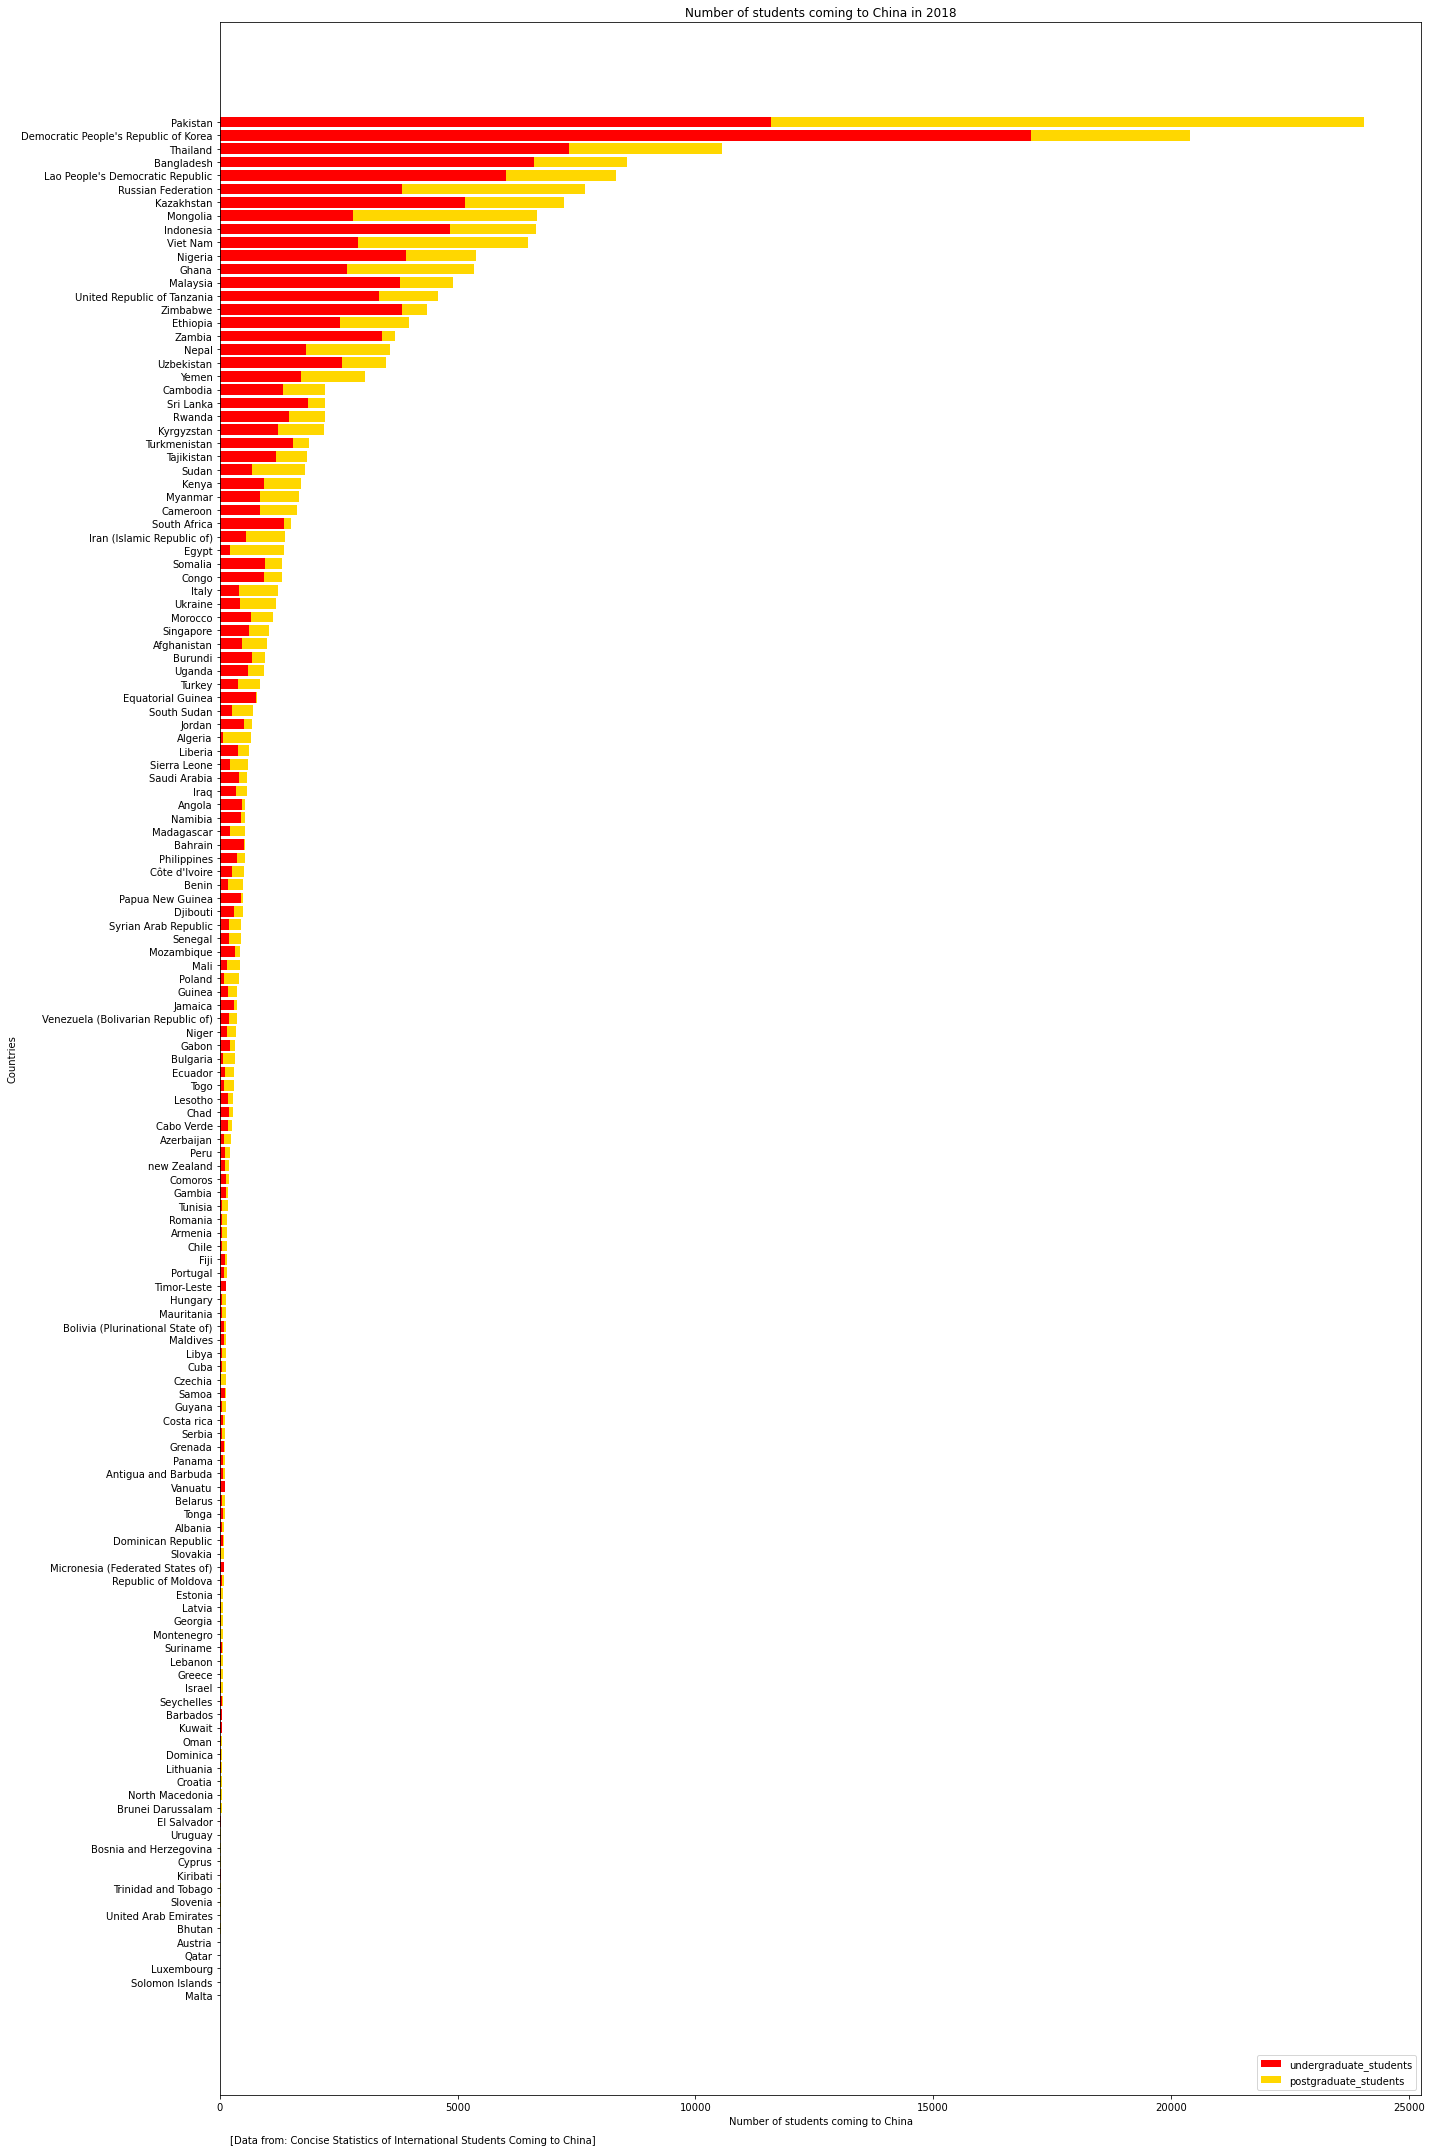

In [66]:
plt.barh(ind, undergraduate_students, label='undergraduate_students', color='red')
plt.barh(ind, postgraduate_students, left=undergraduate_students, label='postgraduate_students', color='gold')
plt.gca().invert_yaxis()

plt.yticks(ind, countries)
plt.xlabel("Number of students coming to China")
plt.ylabel("Countries")
plt.title("Number of students coming to China in 2018")
plt.legend(loc="lower right")

plt.annotate('[Data from: Concise Statistics of International Students Coming to China]', (0,0), (10,-40), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

### Data Visualization_2

In [67]:
# Establish a connection with the database
conn = sqlite3.connect("students_CTC.sqlite")

In [68]:
# We can write pretty much any query we would in SQLite,
# evalutate it, and then return back the results from
# the query.
query1 = '''
WITH algeria_a as (
	select 
	region,
	year,
	avg(stu_CTC) as Africa_
	from students_CTC
	where region = "Africa"
	group by year
),
algeria_b as (
	select 
	region,
	year,
	avg(stu_CTC) as America_
	from students_CTC
	where region = "America"
	group by year
),
algeria_c as (
	select 
	region,
	year,
	avg(stu_CTC) as Asia_
	from students_CTC
	where region = "Asia"
	group by year
),
algeria_d as (
	select 
	region,
	year,
	avg(stu_CTC) as Eurppe_
	from students_CTC
	where region = "Eurppe"
	group by year
),
algeria_e as (
	select 
	region,
	year,
	avg(stu_CTC) as Oceania_
	from students_CTC
	where region = "Oceania"
	group by year
)
select 
	a.*,
	b.America_,
	c.Asia_,
	d.Eurppe_,
	e.Oceania_
from algeria_a a
left join algeria_b b on (a.year = b.year)
left join algeria_c c on (a.year = c.year) 
left join algeria_d d on (a.year = d.year) 
left join algeria_e e on (a.year = e.year)
'''

In [69]:
V2=pd.read_sql(query1,conn)##read in the data
#V2.head(10)

<function matplotlib.pyplot.show(close=None, block=None)>

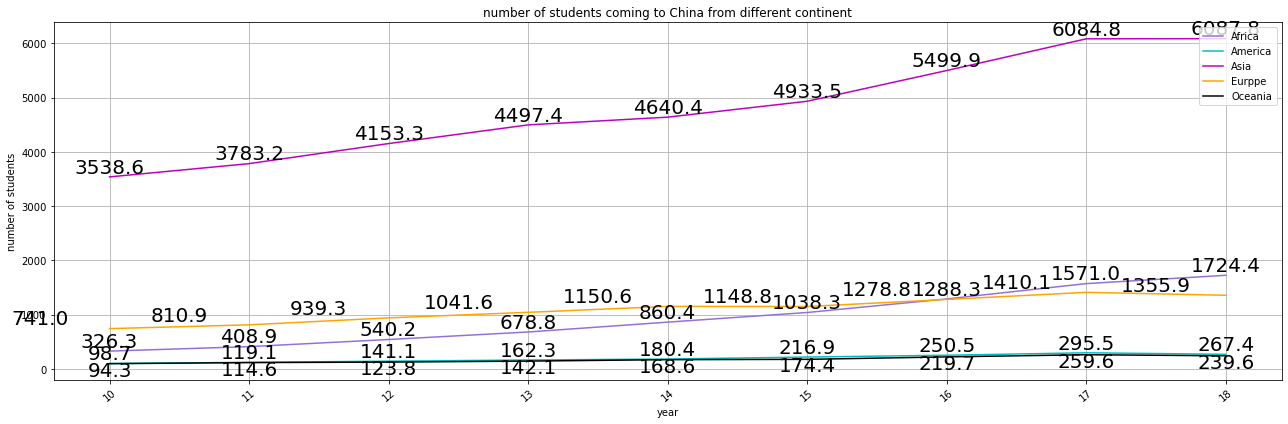

In [70]:
# Disconnect from connection
conn.close()

##Plot 
plt.figure(figsize=(18,6))
plt.plot(V2.loc[:,"year"],V2.loc[:,"Africa_"],color="mediumpurple")##set the line of "Trump_state"
plt.plot(V2.loc[:,"year"],V2.loc[:,"America_"],color="c")##set the line of "Clinton_state"
plt.plot(V2.loc[:,"year"],V2.loc[:,"Asia_"],color="m")##set the line of "Trump_state"
plt.plot(V2.loc[:,"year"],V2.loc[:,"Eurppe_"],color="orange")##set the line of "Clinton_state"
plt.plot(V2.loc[:,"year"],V2.loc[:,"Oceania_"],color="black")##set the line of "Trump_state"
plt.xticks(rotation=40)
plt.title("number of students coming to China from different continent")
plt.xlabel("year")##label the x axis
plt.ylabel("number of students")##label the y axis

Africa = round(V2['Africa_'],1)
America = round(V2['America_'],1)
Asia = round(V2['Asia_'],1)
Eurppe = round(V2['Eurppe_'],1)
Oceania = round(V2['Oceania_'],1)
year = V2['year']
for a, b in zip(year, Africa):
    plt.text(a, b, b,ha="center", va="bottom", fontsize=20)
for c, d in zip(year, America):
    plt.text(c, d, d,ha="center", va="bottom", fontsize=20)
for e, f in zip(year,Asia):
    plt.text(e, f, f,ha="center", va="bottom", fontsize=20)
for g, h in zip(year, Eurppe):
    plt.text(g-0.5, h, h,ha="center", va="bottom", fontsize=20)
for i, j in zip(year,Oceania):
    plt.text(i, j-300, j,ha="center", va="bottom", fontsize=20)             

plt.legend(["Africa","America","Asia","Eurppe","Oceania"],loc="upper right", fontsize=10)
plt.grid()
plt.show## show the plot

### Data Visualization_3

In [71]:
# Establish a connection with the database
conn = sqlite3.connect("students_CTC.sqlite")

In [72]:
# We can write pretty much any query we would in SQLite,
# evalutate it, and then return back the results from
# the query.
query1 = '''
WITH algeria_a as (
	select 
	year,
	avg(stu_CTC) as stu_CTC_
    from students_CTC
    group by year
),
algeria_b as (
	select 
	year,
	avg(stu_degree) as stu_degree_
    from students_CTC
    group by year
),
algeria_c as (
	select 
	year,
	avg(stu_non_degree) as stu_non_degree_
    from students_CTC
    group by year
),
algeria_d as (
	select 
	year,
	avg(stu_postgra) as stu_postgra_
    from students_CTC
    group by year
),
algeria_e as (
	select 
	year,
	avg(stu_undergra) as stu_undergra_
    from students_CTC
    group by year
)
select 
	a.*,
	b.stu_degree_,
	c.stu_non_degree_,
	d.stu_postgra_,
	e.stu_undergra_
from algeria_a a
left join algeria_b b on (a.year = b.year)
left join algeria_c c on (a.year = c.year) 
left join algeria_d d on (a.year = d.year) 
left join algeria_e e on (a.year = e.year)
'''

In [73]:
V3=pd.read_sql(query1,conn)##read in the data
#V3.head(10)

<function matplotlib.pyplot.show(close=None, block=None)>

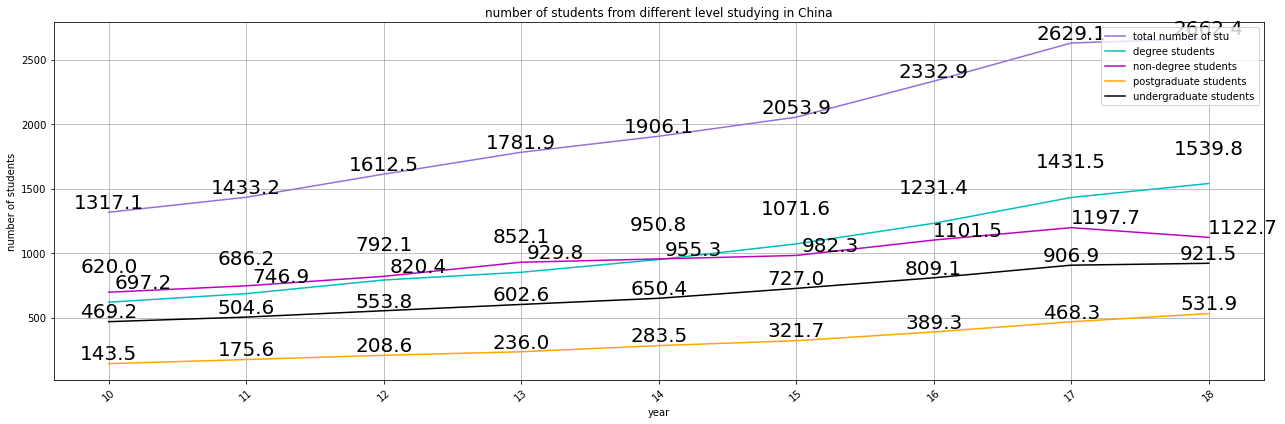

In [74]:
# Disconnect from connection
conn.close()

##Plot 
plt.figure(figsize=(18,6))
plt.plot(V3.loc[:,"year"],V3.loc[:,"stu_CTC_"],color="mediumpurple")##set the line of "Trump_state"
plt.plot(V3.loc[:,"year"],V3.loc[:,"stu_degree_"],color="c")##set the line of "Clinton_state"
plt.plot(V3.loc[:,"year"],V3.loc[:,"stu_non_degree_"],color="m")##set the line of "Trump_state"
plt.plot(V3.loc[:,"year"],V3.loc[:,"stu_postgra_"],color="orange")##set the line of "Clinton_state"
plt.plot(V3.loc[:,"year"],V3.loc[:,"stu_undergra_"],color="black")##set the line of "Trump_state"
plt.xticks(rotation=40)
plt.title("number of students from different level studying in China")
plt.xlabel("year")##label the x axis
plt.ylabel("number of students")##label the y axis

stu_CTC = round(V3['stu_CTC_'],1)
stu_degree = round(V3['stu_degree_'],1)
stu_non_degree = round(V3['stu_non_degree_'],1)
stu_postgra = round(V3['stu_postgra_'],1)
stu_undergra = round(V3['stu_undergra_'],1)
year = V3['year']
for a, b in zip(year, stu_CTC):
    plt.text(a, b, b,ha="center", va="bottom", fontsize=20)
for c, d in zip(year, stu_degree):
    plt.text(c, d+200, d,ha="center", va="bottom", fontsize=20)
for e, f in zip(year,stu_non_degree):
    plt.text(e+0.25, f, f,ha="center", va="bottom", fontsize=20)
for g, h in zip(year, stu_postgra):
    plt.text(g, h, h,ha="center", va="bottom", fontsize=20)
for i, j in zip(year,stu_undergra):
    plt.text(i, j, j,ha="center", va="bottom", fontsize=20)             

plt.legend(["total number of stu","degree students","non-degree students","postgraduate students","undergraduate students"],loc="upper right", fontsize=10)
plt.grid()
plt.show## show the plot

### Data Visualization_4

In [75]:
# Establish a connection with the database
conn = sqlite3.connect("students_CTC_new.sqlite")

# We can then write data to this database using .to_sql() method
#students_CTC_new.to_sql(name="students_CTC_new",con=conn,index=False)

pd.read_sql("select * from students_CTC_new", conn)

,Unnamed: 0,Country Name,region,year,stu_CTC,stu_undergra,stu_postgra,stu_degree,stu_non_degree,scholarship_num_CTC,...,Academic_recognition,outbound_higheredu,value_of_trade,distance,RD_number,unemployment,GDP_per_capita,vis_a_vis_GDP,precentage_of_scholarship,HDI_cat
0,0,Afghanistan,Asia,2010,225,115,9,124,101,63,...,0,7759,178945028,4180.438,1101.6867,1.690000,1.597483e+10,0.002115,0.280000,Least Developed Countries
1,1,Afghanistan,Asia,2011,291,155,16,171,120,90,...,0,9344,234413053,4180.438,1165.2520,1.690000,1.604294e+10,0.001939,0.309278,Least Developed Countries
2,2,Afghanistan,Asia,2012,335,181,24,205,130,95,...,0,9685,469220111,4180.438,1186.6525,1.690000,1.808878e+10,0.002026,0.283582,Least Developed Countries
3,3,Afghanistan,Asia,2013,385,210,41,251,134,102,...,0,13338,337854104,4180.438,1243.4696,4.800000,1.910189e+10,0.001986,0.264935,Least Developed Countries
4,4,Afghanistan,Asia,2014,457,229,63,292,165,112,...,0,19529,410931057,4180.438,1279.5067,7.910000,1.962233e+10,0.001899,0.245077,Least Developed Countries
5,5,Afghanistan,Asia,2015,496,278,85,363,133,125,...,0,24408,373590533,4180.438,1324.9371,9.000000,1.990711e+10,0.001800,0.252016,Least Developed Countries
6,6,Afghanistan,Asia,2016,742,371,160,534,208,196,...,0,28762,435187362,4180.438,1367.6355,10.090000,2.035707e+10,0.001722,0.264151,Least Developed Countries
7,7,Afghanistan,Asia,2017,1277,397,321,722,555,309,...,0,29677,544633604,4180.438,1453.6755,11.180000,2.089593e+10,0.001653,0.241973,Least Developed Countries
8,8,Afghanistan,Asia,2018,1618,463,530,998,620,421,...,0,23809,691976627,4180.438,1509.8906,11.180000,2.114443e+10,0.001567,0.260198,Least Developed Countries
9,9,Albania,Eurppe,2010,45,23,7,30,15,16,...,0,23610,346850340,7686.079,1101.6867,14.090000,1.042018e+10,0.001379,0.355556,developing


In [76]:
# Establish a connection with the database
conn = sqlite3.connect("students_CTC_new.sqlite")

In [77]:
# We can write pretty much any query we would in SQLite,
# evalutate it, and then return back the results from
# the query.
query2 = '''
WITH algeria_a as (
	select 
	year,
	avg(stu_CTC) as developing_countries
	from students_CTC_new
	where HDI_cat = "developing"
	group by year
),
algeria_b as (
	select 
	year,
	avg(stu_CTC) as developed_countries
	from students_CTC_new
	where HDI_cat = "developed"
	group by year
),
algeria_c as (
	select 
	year,
	avg(stu_CTC) as last_developed_countries
	from students_CTC_new
	where HDI_cat = "Least Developed Countries"
	group by year
)
select 
	a.*,
	b.developed_countries,
	c.last_developed_countries
from algeria_a a
left join algeria_b b on (a.year = b.year)
left join algeria_c c on (a.year = c.year)  
'''

In [78]:
V4=pd.read_sql(query2,conn)##read in the data
#V4.head(10)

<function matplotlib.pyplot.show(close=None, block=None)>

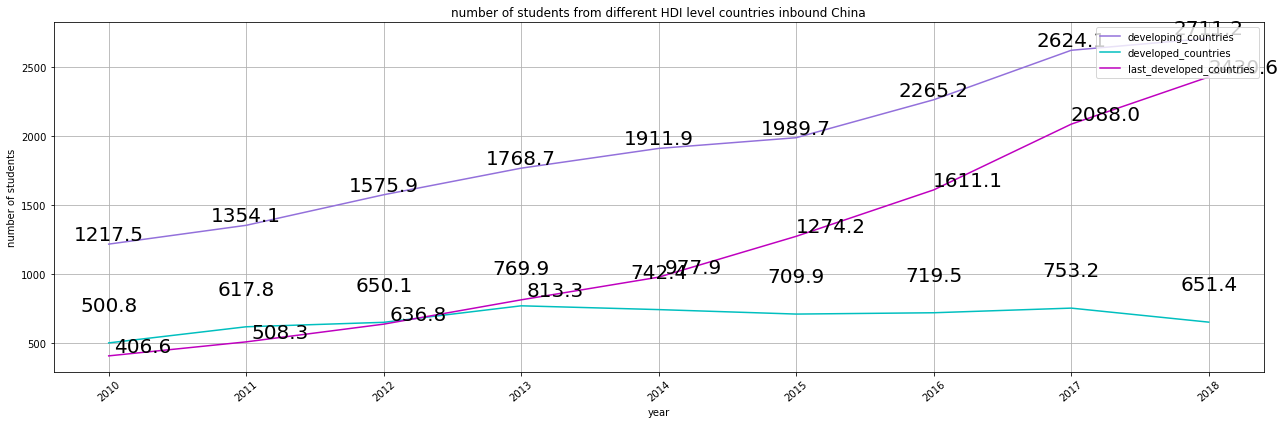

In [79]:
# Disconnect from connection
conn.close()

##Plot 
plt.figure(figsize=(18,6))
plt.plot(V4.loc[:,"year"],V4.loc[:,"developing_countries"],color="mediumpurple")##set the line of "Trump_state"
plt.plot(V4.loc[:,"year"],V4.loc[:,"developed_countries"],color="c")##set the line of "Clinton_state"
plt.plot(V4.loc[:,"year"],V4.loc[:,"last_developed_countries"],color="m")##set the line of "Trump_state"
plt.xticks(rotation=40)
plt.title("number of students from different HDI level countries inbound China")
plt.xlabel("year")##label the x axis
plt.ylabel("number of students")##label the y axis

developing_countries = round(V4['developing_countries'],1)
developed_countries = round(V4['developed_countries'],1)
last_developed_countries = round(V4['last_developed_countries'],1)
year = V4['year']
for a, b in zip(year, developing_countries):
    plt.text(a, b, b,ha="center", va="bottom", fontsize=20)
for c, d in zip(year, developed_countries):
    plt.text(c, d+200, d,ha="center", va="bottom", fontsize=20)
for e, f in zip(year,last_developed_countries):
    plt.text(e+0.25, f, f,ha="center", va="bottom", fontsize=20)

plt.legend(["developing_countries","developed_countries","last_developed_countries"],loc="upper right", fontsize=10)
plt.grid()
plt.show## show the plot

## Statistical Learning

In [80]:
students_CTC_new = pd.read_excel("stu_CTC_new.xlsx")
#students_CTC_new.head(4)
students_CTC_new.replace({"HDI_cat":{"Least Developed Countries":0,"developing":0,"developed":1}},inplace=True)
#students_CTC_new.shape
#students_CTC_new.columns

students_CTC_new=students_CTC_new.rename(columns={ 'region ': 'region','distance ':'distance'}) 
#students_CTC_new.columns

# Filter method to "filter out" columns
students_CTC_new0=students_CTC_new.filter(['scholarship_num_CTC', 'stu_teacher_ratio', 'enrol_higheredu',
       'financial_percapital', 'Academic_recognition', 'outbound_higheredu',
       'value_of_trade', 'distance', 'RD_number', 'unemployment',
       'GDP_per_capita', 'vis_a_vis_GDP', 'precentage_of_scholarship',
       'HDI_cat'])

Set up data in the SKLEARN framework (i.e. outcome separated from the predictors).

In [81]:
# Filter method to "filter out" columns
students_CTC_new1=students_CTC_new.filter(['stu_CTC','scholarship_num_CTC', 'stu_teacher_ratio', 'enrol_higheredu',
       'financial_percapital', 'Academic_recognition', 'outbound_higheredu',
       'value_of_trade', 'distance', 'RD_number', 'unemployment',
       'GDP_per_capita', 'vis_a_vis_GDP', 'precentage_of_scholarship',
       'HDI_cat'])

students_CTC_new1.replace(np.inf, 0, inplace=True)
students_CTC_new1=students_CTC_new1.fillna(0)

### Classification Model

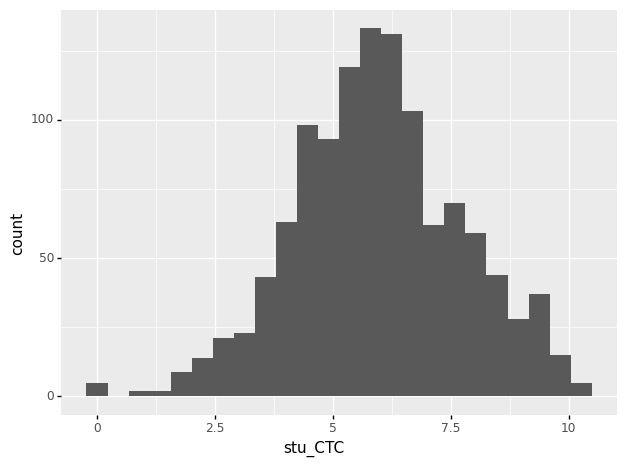

<ggplot: (132383494560)>

In [82]:
students_CTC_N1=students_CTC_new1.copy()
students_CTC_N1["stu_CTC"]=np.log(students_CTC_N1["stu_CTC"]+1)
(
    ggplot(students_CTC_N1,aes(x="stu_CTC")) +
    geom_histogram() 
    
) 

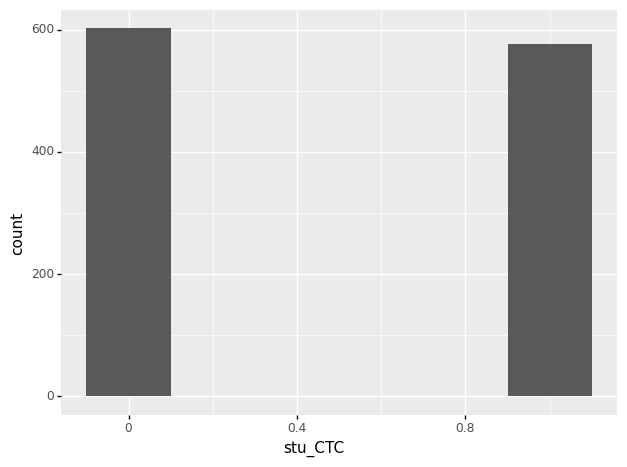

<ggplot: (132382283472)>

In [83]:
#students_CTC_N1.describe(include="all")
##classify Y into two categroies 
mean_ctc = students_CTC_N1['stu_CTC'].mean()
students_CTC_N1["stu_CTC"] =np.where(students_CTC_N1["stu_CTC"]>=mean_ctc,1,0)
(
    ggplot(students_CTC_N1,aes(x="stu_CTC")) +
    geom_histogram() 
    
) 

In [84]:
students_CTC_N1['stu_CTC'] = students_CTC_N1['stu_CTC'].astype("category")

In [85]:
y = students_CTC_N1['stu_CTC'] 
X = students_CTC_N1[['precentage_of_scholarship', 'stu_teacher_ratio',
       'enrol_higheredu', 'financial_percapital', 'Academic_recognition',
       'outbound_higheredu', 'vis_a_vis_GDP', 'value_of_trade', 'distance',
       'unemployment', 'RD_number', 'HDI_cat']] # PREDICTORS: simplified for our purposes
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1998)

#X.describe(include="all")
X.replace(np.inf, 0, inplace=True)

In [86]:
students_CTC_N1=students_CTC_N1.fillna(0)
X["stu_teacher_ratio"] =np.where(X["stu_teacher_ratio"]<=0,0,X["stu_teacher_ratio"])
X["enrol_higheredu"] =np.where(X["enrol_higheredu"]<=0,0,X["enrol_higheredu"])
X["financial_percapital"] =np.where(X["financial_percapital"]<=0,0,X["financial_percapital"])

In [87]:
X["financial_percapital"] = np.log(X["financial_percapital"] +1)
X["outbound_higheredu"] = np.log(X["outbound_higheredu"]+1)
X["value_of_trade"] = np.log(X["value_of_trade"]+1)
X["vis_a_vis_GDP"] = np.log(X["vis_a_vis_GDP"]+1)
X["unemployment"] = np.log(X["unemployment"]+1)
X[ 'HDI_cat'] = X['HDI_cat'].astype("category")
X[ 'Academic_recognition'] = X['Academic_recognition'].astype("category")
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1998)

In [88]:
# (1) Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=10, shuffle=True,random_state=111)

# (2) Next specify the preprocessing steps
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), ['precentage_of_scholarship', 'stu_teacher_ratio',
       'enrol_higheredu', 'financial_percapital',
       'outbound_higheredu', 'vis_a_vis_GDP', 'value_of_trade', 'distance',
       'unemployment', 'RD_number'])])

# (3) Next Let's create our model pipe (note for the model we leave none as a placeholder)
pipe = Pipeline(steps=[('pre_process', preprocess),
                       ('model',None)])

# (4) Specify the models and their repsective tuning parameters. 
# Note the naming convention here to reference the model key
search_space = [

    
    # KNN with K tuning param
    {'model' : [KNN_C()],
     'model__n_neighbors':[2,3,4,5,10,15,20,25,30]},
    
    # KNN with K tuning param
    {'model' : [LR()],
     'model__penalty':["l1","l2"],
    'model__C':(0.01, 0.05, 0.1,0.2)},

    # Random forest with the N Estimators tuning param
    {'model' : [RF_C()],
     'model__max_depth':[3,4,5,6],
     'model__n_estimators':[300,500,1000,1250]},
]


# (5) Put it all together in the grid search
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='roc_auc',
                      n_jobs=4)

# (6) Fit the model to the training data
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=10, random_state=111, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['precentage_of_scholarship',
                                                                          'stu_teacher_ratio',
                                                                          'enrol_higheredu',
                                                                          'financial_percapital',
                                                                          'outbound_higheredu',
                                                                          'vis_a_vis_GDP',
                                                                          'value_of_trade',
                                        

## Model Evaluation

In [89]:
search.best_params_

{'model': RandomForestClassifier(max_depth=6, n_estimators=500),
 'model__max_depth': 6,
 'model__n_estimators': 500}

In [90]:
search.best_score_ # Mean out-of-sample (CV) error

0.9775585788821688

In [91]:
rf_mod = search.best_estimator_

In [92]:
m.roc_auc_score(train_y,rf_mod.predict_proba(train_X)[:,1])

0.9965702233961955

In [93]:
m.accuracy_score(train_y,rf_mod.predict(train_X))

0.9728506787330317

In [94]:
vi = permutation_importance(rf_mod,train_X,train_y,n_repeats=5)

In [95]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,outbound_higheredu,0.088688,0.009235,0.070219,0.107157
1,precentage_of_scholarship,0.072624,0.005325,0.061974,0.083275
2,value_of_trade,0.061991,0.003879,0.054232,0.069750
3,enrol_higheredu,0.045701,0.004988,0.035726,0.055677
4,stu_teacher_ratio,0.038914,0.008453,0.022008,0.055820
5,distance,0.034163,0.004659,0.024846,0.043480
6,unemployment,0.029186,0.003813,0.021560,0.036811
7,vis_a_vis_GDP,0.013575,0.002580,0.008415,0.018734
8,financial_percapital,0.011086,0.001946,0.007194,0.014978
9,RD_number,0.007014,0.002519,0.001975,0.012052


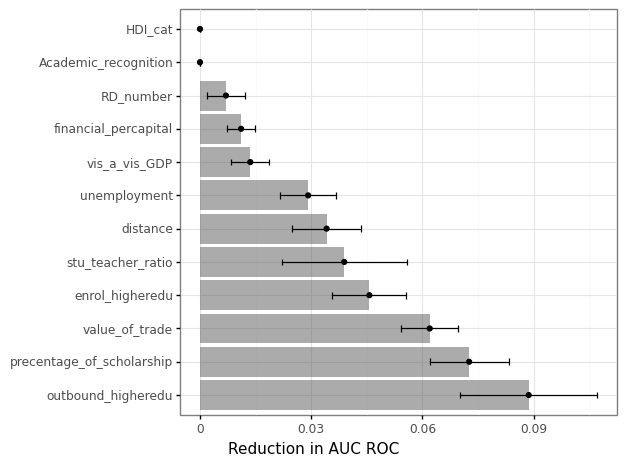

<ggplot: (132382146708)>

In [96]:
# Plot
(
    ggplot(vi_dat,
          aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    theme_bw() +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

## Model Interpretation

#### Permutation Importance

Partial Dependency Plots

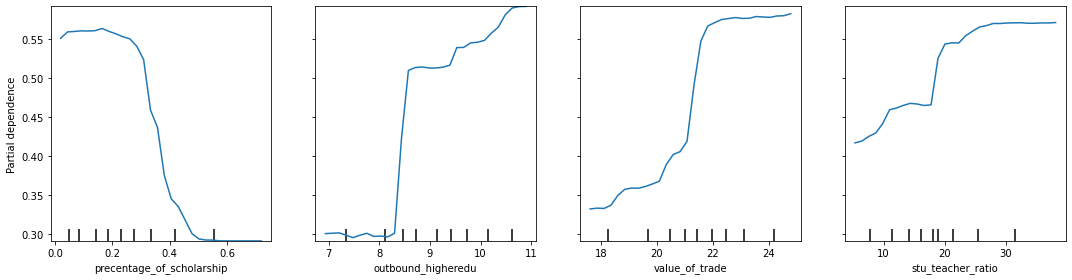

In [97]:
# Target specific features
features = ['precentage_of_scholarship','outbound_higheredu', 'value_of_trade','stu_teacher_ratio']

# Calculate the partial dependency
fig, ax = plt.subplots(figsize=(15, 4))
display = plot_partial_dependence(
    rf_mod, train_X, features,n_cols=5,
    n_jobs=4, grid_resolution=30,ax=ax
)
# display.figure_.set_figwidth(15)
# display.figure_.set_figheight(4)

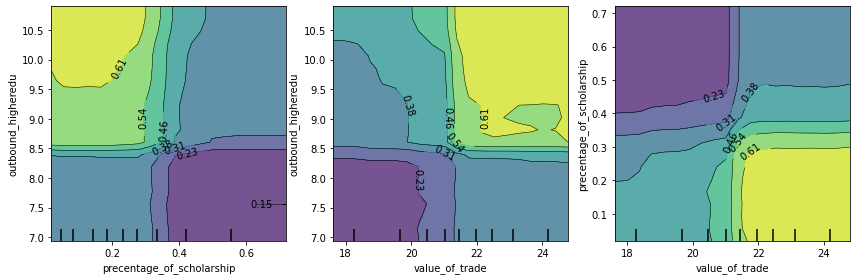

In [98]:
# Feed in the ineraction as a nested list
interacted_features = [['precentage_of_scholarship','outbound_higheredu'],['value_of_trade','outbound_higheredu'],['value_of_trade','precentage_of_scholarship']] 

# Then business as usual when plotting
fig, ax = plt.subplots(figsize=(12, 4))
display = plot_partial_dependence(
    rf_mod, train_X, interacted_features,
    n_cols=3,n_jobs=4, grid_resolution=20,ax=ax
)
fig.tight_layout()

ICE Plots

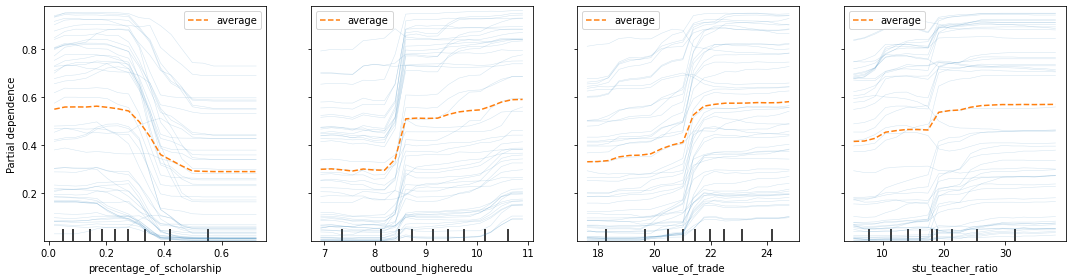

In [99]:
features = ['precentage_of_scholarship','outbound_higheredu', 'value_of_trade','stu_teacher_ratio']
fig, ax = plt.subplots(figsize=(15, 4))
display = PartialDependenceDisplay.from_estimator(
    rf_mod,
    train_X,
    features,
    kind="both", # "average" = just PDP, "individual" = just ICE
    subsample=50,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"},
    n_cols=len(features),
    ax = ax
)
display.figure_.subplots_adjust(hspace=0.3)

The End 